In [90]:
#Import necessary Python dependencies #From Starter Code

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

In [91]:
#Import necessary SqlAlch dependencies that include tool kit and ORM #From Starter Code

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [92]:
#Use create_engine link engine with data base or in this the sqlite file we will use for this portion of the hw
# From Starter Code 

engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [93]:
#Reflect existing db and tbale into a new model/object
#From starter code 

Base = automap_base()

Base.prepare(engine, reflect=True)

In [94]:
#Print out classes that exists in the model above
#From Starter Code
Base.classes.keys()

['measurement', 'station']

In [95]:
#Save classes as references stored in variables 
#From Starter Code 
Station = Base.classes.station
Measurement = Base.classes.measurement

In [96]:
#Create session to activate engine that links Python to DB
#From Starter Code 
session = Session(engine)

In [97]:
#Query to retrieve the last 12 months of precipitation data print total number of results
engine.execute("select * from Measurement limit 12").fetchall()
session.query(func.count(Measurement.date)).all()

[(19550)]

In [98]:
#Prior to calculating the date 1 year ago from last date, we need to find the last date. 
#An alternative way to getting this result would have to completed an order_by on Measurement.date and then list out the first object in descending order. I just find this method easier

LastDate = session.query(func.max(Measurement.date)).all()

LastDate

[('2017-08-23')]

In [99]:
#The only information I need is the string value from within the queried object above. 
#Use of np.ravel function is to extract the string. We learned this function in class. 
LastDate = list(np.ravel(LastDate))[0]

LastDate


'2017-08-23'

In [100]:
#Prior to calculating the year ago date, I need to convert this string into a date.time object
LastDate = dt.datetime.strptime(LastDate, "%Y-%m-%d")

LastDate

datetime.datetime(2017, 8, 23, 0, 0)

In [106]:
#Because we only need the first three values in our object for the date, we need to extract each of those values as unique elements of the date.
#Additionally I wrapped each of these values as integers because that will help me when I query the necessary prcp data

LastMonth = int(dt.datetime.strftime(LastDate, "%m"))
LastDay = int(dt.datetime.strftime(LastDate, "%d"))
LastYear = int(dt.datetime.strftime(LastDate, "%Y"))

print(f"{LastMonth}-{LastDay}-{LastYear}")


8-23-2017


In [107]:
#Calculation of 'year-ago' date from the lastdate 

year_ago_date = dt.date(LastYear, LastMonth, LastDay) - dt.timedelta(days=365)
year_ago_date

datetime.date(2016, 8, 23)

In [114]:
#Query to retrieve the data and precipitation values within this specific year frame

LastYear_PrcpData = (session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago_date).order_by(Measurement.date).all())
LastYear_PrcpData

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [128]:
#Save LastYear_PrcpData as a Pandas DataFrame to view proper linking 
LastYear_PrcpData_df = pd.DataFrame(LastYear_PrcpData)
LastYear_PrcpData_df.head()


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [129]:
#Set index to the date column

LastYear_PrcpData_df = LastYear_PrcpData_df.set_index("date")
LastYear_PrcpData_df.head(15)


,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


In [130]:
#Sort the dataframe by date
LastYear_PrcpData_df = LastYear_PrcpData_df.sort_index(ascending = True)
LastYear_PrcpData_df.head(15)

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


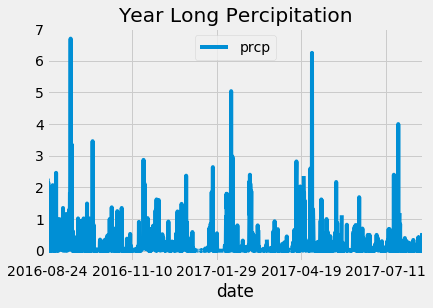

In [141]:
#Plot pandas df using the data above
LastYear_PrcpData_df.plot(title="Year Long Percipitation")
plt.legend(loc='upper center')
plt.show()


In [142]:
#Print summary statistics of percipitation data
LastYear_PrcpData_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [144]:
#Station Analysis 
#Query to display total number of stations in data set
#Similar to when I did a .count earlier to understand the total number of prcp data points, I will do the same here

Station_total = session.query(func.count(Station.station)).all()
Station_total

[(9)]

In [145]:
#To understand which stations are the most active, we can create a list in descending order that will help identify stations with the greatest number of rows. 
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [151]:
#The following tasks on lowest temp, highest temp and average temp of most active station, require us to first identify and set the most active sation from the query above. 
#Going to use the variable: station_id because in our starter code it refers to that variable

MostActive_Station_ID = most_active_stations[0][0]
MostActive_Station_ID

'USC00519281'

In [167]:
#Lowest temp from most active station. Since the most active station has been tagged from our query, performing a func.min will grab the lowest value.
#I did notice without the .all() it just printed out the query as an object as opposed to what's inside the object
lowest_temp = (session.query(func.min(Measurement.tobs)).filter(Measurement.station == MostActive_Station_ID)).all()
lowest_temp

[(54.0)]

In [166]:
#Highest temp is the same code as above with a func.max to the queried data. 
highest_temp = (session.query(func.max(Measurement.tobs)).filter(Measurement.station == MostActive_Station_ID)).all()

highest_temp

[(85.0)]

In [168]:
#Finding the avg. temperature will require us perform a func.avg on our query object to push out our desired result 

average_temp = (session.query(func.avg(Measurement.tobs)).filter(Measurement.station == MostActive_Station_ID)).all()

average_temp 

[(71.66378066378067)]

In [169]:
#Print of summary statistics 

print(f"{lowest_temp}, {highest_temp}, {average_temp}")

[(54.0,)], [(85.0,)], [(71.66378066378067,)]


In [174]:
#Next task requires me to query the last 12 months of temperature observation data for this station and plot the results as a histogram

MostActive_Station_Temps = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= year_ago_date).filter(Measurement.station == MostActive_Station_ID).order_by(Measurement.date).all()

MostActive_Station_Temps

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [178]:
#In order to graph the data above I need to store it as a .pd data frame 

Temps_df = pd.DataFrame(MostActive_Station_Temps)

Temps_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


In [179]:
#As done earlier in this script, I performed a .set_index() to give me the order and specific grouping that I needed
Temps_df = Temps_df.set_index("date")

Temps_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


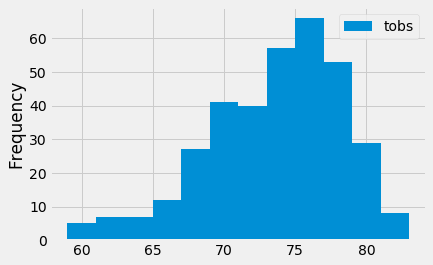

In [180]:
#Histogram of the data frame above 

Temps_df.plot(kind='hist', bins=12)
plt.show()